# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
from numpy import expand_dims
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import math

# Loading Dataset

In [2]:
df = pd.read_csv("C:\\Users\\OvaizAli\\Desktop\\FYP-2021\\FYP-I\\Master\\Data Collection\\CollectedData\\Final_Data (2022).csv", index_col = False)

In [3]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
df.head(7)

,Province,Country_Region,Date,Day,Month,Year,Lat,Long_,Confirmed,Deaths,...,admis_upper_vax,admis_lower_vax,admis_mean_unvax,admis_upper_unvax,admis_lower_unvax,Temp,Wind,Barometer,Visibility,Weather
0,Balochistan,Pakistan,2020-03-10,10,3,2020,28.328492,65.898403,1.0,0.0,...,0.0,0.0,25.615120,44.61881,10.791250,46.29,15.00,31.43,0.00,Haze.
1,Islamabad,Pakistan,2020-03-10,10,3,2020,33.665087,73.121219,2.0,0.0,...,0.0,0.0,0.004133,0.00000,0.000000,65.14,9.57,34.71,21.33,Clear.
2,Punjab,Pakistan,2020-03-10,10,3,2020,30.811346,72.139132,0.0,0.0,...,0.0,0.0,40.904370,89.53674,11.384460,56.40,2.44,23.67,11.88,Clear.
3,Sindh,Pakistan,2020-03-10,10,3,2020,26.009446,68.776807,0.0,0.0,...,0.0,0.0,22.339800,81.02134,6.179772,65.14,9.57,34.71,21.33,Clear.
4,Khyber Pakhtunkhwa,Pakistan,2020-03-10,10,3,2020,34.485332,72.091690,0.0,0.0,...,0.0,0.0,17.376130,39.58196,5.953569,48.80,4.64,49.20,23.21,Fog.
5,Azad Jammu and Kashmir,Pakistan,2020-03-10,10,3,2020,34.027401,73.947253,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,39.86,1.86,42.43,0.00,Clear.
6,Gilgit-Baltistan,Pakistan,2020-03-10,10,3,2020,35.792146,74.982138,2.0,0.0,...,0.0,0.0,12.495310,23.41426,3.297438,32.71,3.71,23.57,12.82,Fog.


# Defining Utility Functions For Model Training

In [5]:
def create_dataset(dataset, look_back, index):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), index]
        dataX.append(a)
        dataY.append(dataset[i + look_back, index])
    return np.array(dataX), np.array(dataY)

In [6]:
def getPredictions(province, col, look_back):
    dfP = df[df['Province'] == province]
    dfP.drop('Country_Region', axis=1, inplace=True)
    dfP.drop('Province', axis=1, inplace=True)
    dfP.drop('Weather', axis=1, inplace=True)
    dfP.drop('Date', axis=1, inplace=True)
    
    index = 0
    
    for i in range(len(dfP.columns)):
        if dfP.columns[i] == col:
            index = i
            
    dfP = dfP.values
    scaler = MinMaxScaler(feature_range=(0, 70))
    dfP = scaler.fit_transform(dfP)
    
    train_size = int(len(dfP) * 0.80)
    test_size = len(dfP) - train_size
    train, test = dfP[0:train_size,:], dfP[train_size:len(dfP),:]

    trainX, trainY = create_dataset(train, look_back, index)
    testX, testY = create_dataset(test, look_back, index)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
    history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    dfP = scaler.inverse_transform(dfP)
    
    train_size = int(len(dfP) * 0.80)
    test_size = len(dfP) - train_size
    train, test = dfP[0:train_size,:], dfP[train_size:len(dfP),:]

    trainX, trainY = create_dataset(train, look_back, index)
    testX, testY = create_dataset(test, look_back, index)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    return dfP, trainX, trainY, testX, testY, trainPredict, testPredict, index, model, history

# Predicting Cumulative Confirmed Cases for each Province in next 7 days

In [7]:
dataset, trainX, trainY, testX, testY, trainPredict, testPredict, index, model, history = getPredictions("Sindh", "Confirmed", 7)
# bConfModel = createModel("Balochistan", "Confirmed", 7)
# iConfModel = createModel("Islamabad", "Confirmed", 7)
# pConfModel = createModel("Punjab", "Confirmed", 7)
# kConfModel = createModel("Khyber Pakhtunkhwa", "Confirmed", 7)
# aConfModel = createModel("Azad Jammu and Kashmir", "Confirmed", 7)
# gConfModel = createModel("Gilgit-Baltistan", "Confirmed", 7)

In [8]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 236976.74 RMSE
Test Score: 485638.29 RMSE


# Predicting Cumulative Deaths for each Province in next 7 days

In [9]:
dataset, trainX, trainY, testX, testY, trainPredict, testPredict, index, model, history = getPredictions("Sindh", "Deaths", 7)

In [10]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3834.05 RMSE
Test Score: 7576.03 RMSE


# Predicting Cumulative Recovered Cases for each Province in next 7 days

In [11]:
dataset, trainX, trainY, testX, testY, trainPredict, testPredict, index, model, history = getPredictions("Sindh", "Recovered", 7)

In [12]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 217377.34 RMSE
Test Score: 445318.68 RMSE


# Plotting Model(s) Evaluation

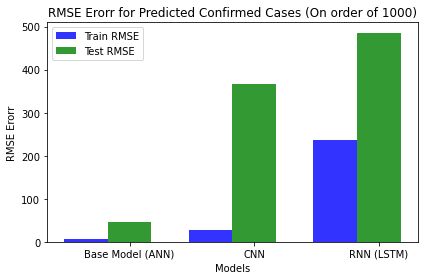

In [13]:
models = ('Base Model (ANN)', 'CNN', 'RNN (LSTM)')
y_pos = np.arange(len(models))
train_rmse = np.divide([6004.69, 28428.34, 236976.74], 1000)
test_rmse = np.divide([46745.83 , 365877.54, 485638.29], 1000)

# create plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train_rmse, bar_width,
alpha = opacity,
color ='b',
label ='Train RMSE')

rects2 = plt.bar(index + bar_width, test_rmse, bar_width,
alpha = opacity,
color = 'g',
label = 'Test RMSE')


plt.xlabel('Models')
plt.ylabel('RMSE Erorr')
plt.title('RMSE Erorr for Predicted Confirmed Cases (On order of 1000)')
plt.xticks(index + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

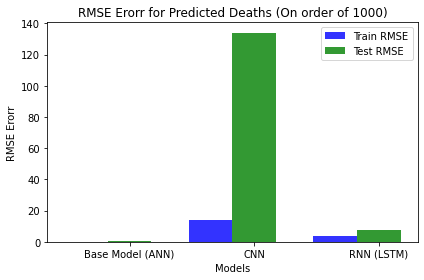

In [14]:
models = ('Base Model (ANN)', 'CNN', 'RNN (LSTM)')
y_pos = np.arange(len(models))
train_rmse = np.divide([170.28, 13657.62, 3834.05], 1000)
test_rmse = np.divide([788.45, 133902.89, 7576.03], 1000)

# create plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train_rmse, bar_width,
alpha = opacity,
color ='b',
label ='Train RMSE')

rects2 = plt.bar(index + bar_width, test_rmse, bar_width,
alpha = opacity,
color = 'g',
label = 'Test RMSE')


plt.xlabel('Models')
plt.ylabel('RMSE Erorr')
plt.title('RMSE Erorr for Predicted Deaths (On order of 1000)')
plt.xticks(index + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

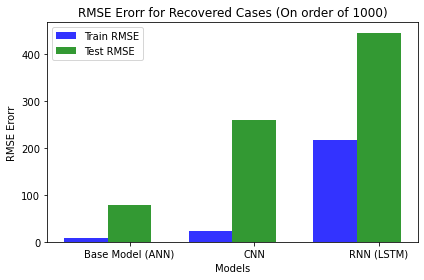

In [15]:
models = ('Base Model (ANN)', 'CNN', 'RNN (LSTM)')
y_pos = np.arange(len(models))
train_rmse = np.divide([8912.54, 23962.91, 217377.34], 1000)
test_rmse = np.divide([79334.79, 258891.96, 445318.68], 1000)

# create plot
fig, ax = plt.subplots()
index = np.arange(3)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train_rmse, bar_width,
alpha = opacity,
color ='b',
label ='Train RMSE')

rects2 = plt.bar(index + bar_width, test_rmse, bar_width,
alpha = opacity,
color = 'g',
label = 'Test RMSE')


plt.xlabel('Models')
plt.ylabel('RMSE Erorr')
plt.title('RMSE Erorr for Recovered Cases (On order of 1000)')
plt.xticks(index + bar_width, models)
plt.legend()

plt.tight_layout()
plt.show()

In [419]:
# # data to plot
# n_groups = 4
# rmse = [4,10182600.0,236974.65]
# # means_guido = (85, 62, 54, 20)

# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8

# # rects1 = plt.bar(index, means_frank, bar_width,
# # alpha=opacity,
# # color='b',
# # label='Frank')

# rects2 = plt.bar(index + bar_width, rmse, bar_width,
# alpha=opacity,
# color='g',
# label='Guido')

# plt.xlabel('Person')
# plt.ylabel('Scores')
# plt.title('Scores by person')
# plt.xticks(index + bar_width, ('A', 'B', 'C'))
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:
# fig2 = plt.figure(figsize = (15,10))
# # plt.plot(end_dts , ya_baloc, '-o',label='y-actual');
# plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
# plt.plot(end_dts , yp_baloc, '-o',label='y-predicted from nueral network');

# plt.grid(); plt.legend(prop={'size': 20});
# plt.xlabel('Dates',fontsize=20); 
# plt.ylabel('Cummulative Number of Deaths',fontsize=20); 

In [246]:
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

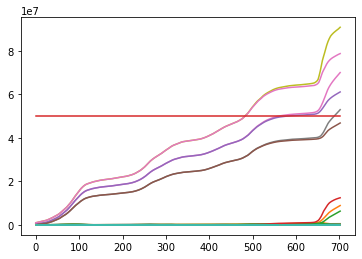

In [322]:
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

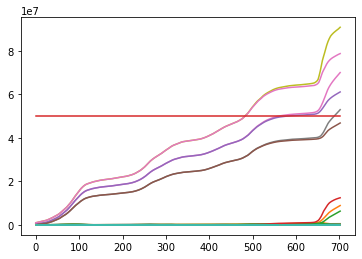

In [321]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()